# Columns description

- **index**: The index of the dataframe  
- **budget**: The budget of the movie  
- **genres**: The genres of the movie  
- **homepage**: The homepage URL of the movie  
- **id**: The unique identifier of the movie  
- **keywords**: The keywords associated with the movie  
- **original_language**: The original language of the movie  
- **original_title**: The original title of the movie  
- **overview**: A brief overview or summary of the movie  
- **popularity**: The popularity score of the movie  
- **production_companies**: The production companies involved in making the movie  
- **production_countries**: The countries where the movie was produced  
- **release_date**: The release date of the movie  
- **revenue**: The revenue generated by the movie  
- **runtime**: The duration of the movie in minutes  
- **spoken_languages**: The languages spoken in the movie  
- **status**: The status of the movie (e.g., Released, Rumored)  
- **tagline**: The tagline or slogan of the movie  
- **title**: The title of the movie  
- **vote_average**: The average rating given to the movie by users  
- **vote_count**: The number of votes received by the movie  
- **cast**: The cast members of the movie  
- **crew**: The crew members involved in making the movie  
- **director**: The director of the movie  


In [443]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
import numpy as np

data = pd.read_csv("movies.csv")


pd.set_option("display.max_columns", None)

In [444]:
data.head()

,index,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew,director
0,0,237000000,Action Adventure Fantasy Science Fiction,http://www.avatarmovie.com/,19995,culture clash future space war space colony so...,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Sam Worthington Zoe Saldana Sigourney Weaver S...,"[{'name': 'Stephen E. Rivkin', 'gender': 0, 'd...",James Cameron
1,1,300000000,Adventure Fantasy Action,http://disney.go.com/disneypictures/pirates/,285,ocean drug abuse exotic island east india trad...,en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Johnny Depp Orlando Bloom Keira Knightley Stel...,"[{'name': 'Dariusz Wolski', 'gender': 2, 'depa...",Gore Verbinski
2,2,245000000,Action Adventure Crime,http://www.sonypictures.com/movies/spectre/,206647,spy based on novel secret agent sequel mi6,en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Daniel Craig Christoph Waltz L\u00e9a Seydoux ...,"[{'name': 'Thomas Newman', 'gender': 2, 'depar...",Sam Mendes
3,3,250000000,Action Crime Drama Thriller,http://www.thedarkknightrises.com/,49026,dc comics crime fighter terrorist secret ident...,en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,Christian Bale Michael Caine Gary Oldman Anne ...,"[{'name': 'Hans Zimmer', 'gender': 2, 'departm...",Christopher Nolan
4,4,260000000,Action Adventure Science Fiction,http://movies.disney.com/john-carter,49529,based on novel mars medallion space travel pri...,en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,Taylor Kitsch Lynn Collins Samantha Morton Wil...,"[{'name': 'Andrew Stanton', 'gender': 2, 'depa...",Andrew Stanton


In order to avoid problems with NaN values, we replace NaNs with empty strings

In [445]:
data.fillna('', inplace=True)

<ipython-input-445-ef1669ca794c>:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  data.fillna('', inplace=True)


In [446]:
pop_data=data

We remove punctuation in order to be able to recognize individual words without any additional marks.

In [447]:
import re

def remove_punctuation(text):

    import string
    text=re.sub(r'[^\w\s]', ' ', text)
    return (text)

data["keywords"] = data["keywords"].apply(lambda x: remove_punctuation(x) if isinstance(x, str) else x)

# Splitting the data to two classes

We want to determine what would be the best way to split the data to positive and negative movie ratings.

In [448]:
votes=data['vote_average'].value_counts()

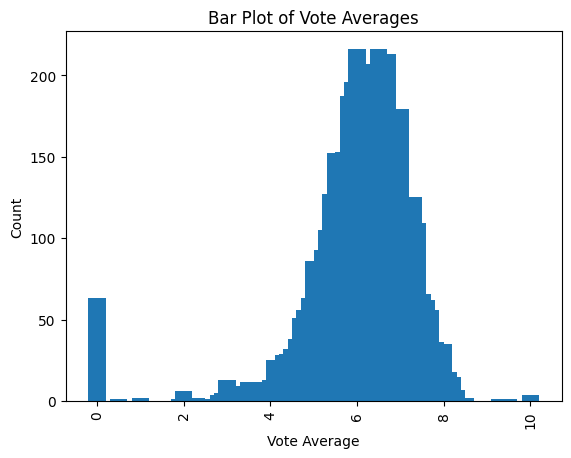

In [449]:
plt.bar(votes.index, votes.values, width=0.4)

plt.xlabel('Vote Average')
plt.ylabel('Count')
plt.title('Bar Plot of Vote Averages')
plt.xticks(rotation=90)


plt.show()

As we can see on the plot, if we want to split the data to negative and positive categories and eliminate nautral ones, it would be reasonable to **exclude rating 6 - 6.5 (treating them as neutral)** and at the same time treat:


*   **0 - 6** as negative data
*   **6,5 - 10** as positive data

We can also see that there are many ratings with value 0. This suggests that the rating is not given here so we want to exclude these ratings as well.



We delete data with vote average equal to 0 and neutral vote average.

In [450]:
data.drop(data[(data['vote_average'] >6) & (data['vote_average'] <6.5)].index, inplace=True)
data.drop(data[(data['vote_average'] ==0)].index, inplace=True)

We create two classes, negative and positive.

In [451]:
data.loc[(data['vote_average'] >= 0 ) & (data['vote_average'] <= 6), 'vote_average'] = -1
data.loc[(data['vote_average'] >= 6.5 ) & (data['vote_average'] <= 10), 'vote_average'] = 1

In [452]:
data['vote_average'].value_counts()

,count
vote_average,
-1.0,1984
1.0,1947


We can see that after these operations our sets of positive and negative data have similar size.

# Building model for data

Some of keywords contain numbers and we don't want to take them into consideration, so we se function remove_digits inside of vectorizer.

In [453]:
def remove_digits(text):
    return re.sub(r'\d+', '', text)

In [454]:
from sklearn.feature_extraction.text import TfidfVectorizer

X = data['keywords']
y = data['vote_average']

vectorizer = TfidfVectorizer(token_pattern=r'\b\w{3,}\b', preprocessor=remove_digits )
X_tfidf = vectorizer.fit_transform(X)

We split the data to train and test sets.

In [455]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size = 0.3)

We use Multinomial Naive Bayes model to fit the data.

In [456]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report

model = MultinomialNB()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        -1.0       0.59      0.71      0.64       573
         1.0       0.66      0.54      0.59       607

    accuracy                           0.62      1180
   macro avg       0.63      0.62      0.62      1180
weighted avg       0.63      0.62      0.62      1180



We can see that the predictions accuracy is 61% so it's not very high. It's higher for positive data.

In [457]:
words = vectorizer.get_feature_names_out()

In [458]:
print(words)

['abandoned' 'abduction' 'abroad' ... 'zombie' 'zone' 'zoo']


In [459]:
log_prob = model.feature_log_prob_

print(log_prob)


[[-8.40903785 -8.16754958 -8.82215856 ... -6.68256563 -8.42956126
  -8.14550741]
 [-8.85845003 -8.85845003 -8.49559487 ... -8.08729846 -8.85845003
  -8.85845003]]


These are log likelyhoods of belonging to each class for every word.

In [460]:
to_print=['negative','positive']
for class_idx, class_log_prob in enumerate(log_prob):
    print(f"Most important words, class {to_print[class_idx]}:")
    top_keywords = np.argsort(class_log_prob)[::-1]
    for i in top_keywords[:5]:
        print(f" - {words[i]}: {class_log_prob[i]}")


Most important words, class negative:
 - film: -5.24699684598062
 - independent: -5.291148390892752
 - woman: -5.658363519867512
 - director: -5.725823288745784
 - duringcreditsstinger: -5.839925555145411
Most important words, class positive:
 - based: -5.576889187095181
 - war: -5.601306094233826
 - relationship: -5.615229207485693
 - film: -5.731274522660104
 - novel: -5.786844742688746


As we can see the result is quite surprising - we wouldn't say these words suggest higher or lower rating of movie. It's probably because the dataset isn't big enough, so our data aren't that meaninglful.

In order to treat directors fullname as one word, we replace the space character with "_".

In [461]:
data['director'] = data['director'].str.replace(' ', '_')

In [462]:
from sklearn.feature_extraction.text import TfidfVectorizer

X = data['director']
y = data['vote_average']

X_tfidf = vectorizer.fit_transform(X)

In [463]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size = 0.3)

In [464]:
model = MultinomialNB()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        -1.0       0.68      0.29      0.41       610
         1.0       0.53      0.85      0.65       570

    accuracy                           0.56      1180
   macro avg       0.60      0.57      0.53      1180
weighted avg       0.61      0.56      0.53      1180



After using the same model, we get its accuracy once again. This time it's 56% so a bit lower than before. We can see that our model predicts positive data much batter than negative.

The reason of this may be the fact, that for less recognizable directors we have less data, so it's hard to train the model well.

In [465]:
directors= vectorizer.get_feature_names_out()

In [466]:
log_prob = model.feature_log_prob_

print(log_prob)


[[-8.20186848 -8.20186848 -8.20186848 ... -7.66706848 -8.20186848
  -8.20186848]
 [-8.20222339 -7.50907621 -8.20222339 ... -7.6674234  -7.32084981
  -7.6674234 ]]


In [467]:
best_directors={}
worst_directors={}

for class_idx, class_log_prob in enumerate(log_prob):
    top_directors = np.argsort(class_log_prob)[::-1]
    for i in top_directors[:50]:
        if class_idx==1:
          best_directors.update({directors[i]: class_log_prob[i]})
        else:
          worst_directors.update({directors[i]: class_log_prob[i]})

print(best_directors)
print(worst_directors)

{'Martin_Scorsese': -5.563166063047971, 'Steven_Spielberg': -5.637274035201694, 'Woody_Allen': -5.899638299669184, 'Clint_Eastwood': -5.899638299669184, 'Francis_Ford_Coppola': -6.00499881532701, 'Tim_Burton': -6.00499881532701, 'Richard_Linklater': -6.00499881532701, 'Peter_Jackson': -6.122781850983394, 'Ron_Howard': -6.122781850983394, 'Ridley_Scott': -6.122781850983394, 'Jean': -6.183922765578847, 'Alfred_Hitchcock': -6.2563132436079165, 'Joel_Coen': -6.2563132436079165, 'David_Fincher': -6.2563132436079165, 'Spike_Lee': -6.2563132436079165, 'Christopher_Nolan': -6.2563132436079165, 'Stephen_Frears': -6.4104639234351755, 'Wes_Anderson': -6.4104639234351755, 'Joe_Wright': -6.4104639234351755, 'Barry_Levinson': -6.4104639234351755, 'Tony_Scott': -6.4104639234351755, 'Robert_Zemeckis': -6.4104639234351755, 'Doug_Liman': -6.4104639234351755, 'Guy_Ritchie': -6.4104639234351755, 'Rob_Reiner': -6.4104639234351755, 'James_Wan': -6.4104639234351755, 'Chris_Columbus': -6.4104639234351755, 'Ol

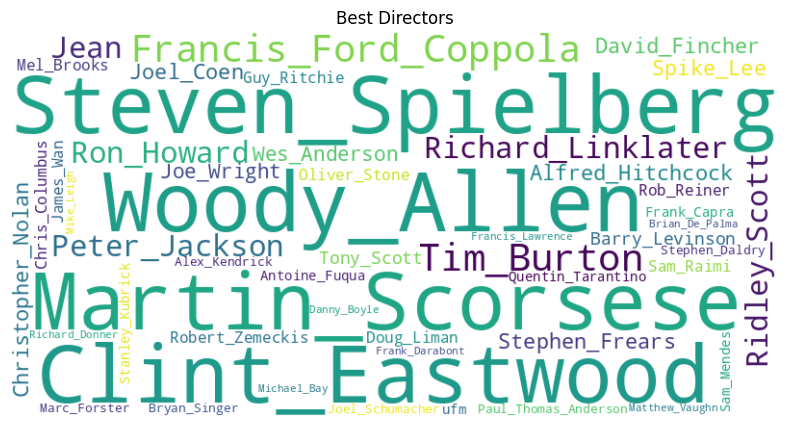

In [468]:
wordcloud = WordCloud(width=800, height=400, background_color="white").generate_from_frequencies(best_directors)


plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Best Directors")
plt.show()

We can see the word cloud of directors that got the highest ratings. There are many popular names, so our predictions look quite reasonable.

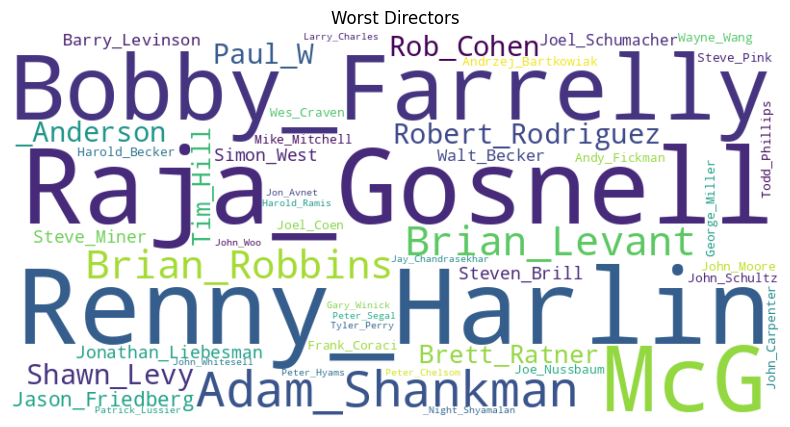

In [469]:
wordcloud = WordCloud(width=800, height=400, background_color="white").generate_from_frequencies(worst_directors)


plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Worst Directors")
plt.show()

In [470]:
best_directors={}


for class_idx, class_log_prob in enumerate(log_prob):
    top_directors = np.argsort(class_log_prob)[::-1]
    for i in top_directors[:50]:
        if class_idx==1:
          best_directors.update({directors[i]: class_log_prob[i]})
        else:
          worst_directors.update({directors[i]: class_log_prob[i]})

print(best_directors)
print(worst_directors)

{'Martin_Scorsese': -5.563166063047971, 'Steven_Spielberg': -5.637274035201694, 'Woody_Allen': -5.899638299669184, 'Clint_Eastwood': -5.899638299669184, 'Francis_Ford_Coppola': -6.00499881532701, 'Tim_Burton': -6.00499881532701, 'Richard_Linklater': -6.00499881532701, 'Peter_Jackson': -6.122781850983394, 'Ron_Howard': -6.122781850983394, 'Ridley_Scott': -6.122781850983394, 'Jean': -6.183922765578847, 'Alfred_Hitchcock': -6.2563132436079165, 'Joel_Coen': -6.2563132436079165, 'David_Fincher': -6.2563132436079165, 'Spike_Lee': -6.2563132436079165, 'Christopher_Nolan': -6.2563132436079165, 'Stephen_Frears': -6.4104639234351755, 'Wes_Anderson': -6.4104639234351755, 'Joe_Wright': -6.4104639234351755, 'Barry_Levinson': -6.4104639234351755, 'Tony_Scott': -6.4104639234351755, 'Robert_Zemeckis': -6.4104639234351755, 'Doug_Liman': -6.4104639234351755, 'Guy_Ritchie': -6.4104639234351755, 'Rob_Reiner': -6.4104639234351755, 'James_Wan': -6.4104639234351755, 'Chris_Columbus': -6.4104639234351755, 'Ol

# Classifying based on popularity


In [471]:
pop_data['popularity'].describe()

,popularity
count,3931.000000
mean,21.833772
std,30.929141
min,0.000372
25%,4.821100
50%,13.034602
75%,28.587797
max,724.247784


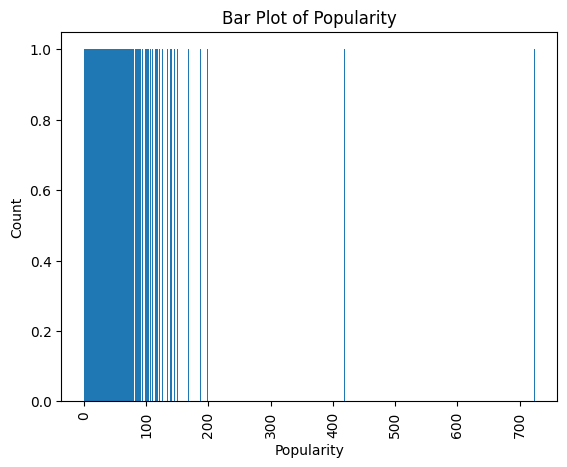

In [472]:
popularity=pop_data['popularity'].value_counts()

plt.bar(popularity.index, popularity.values, width=0.4)

plt.xlabel('Popularity')
plt.ylabel('Count')
plt.title('Bar Plot of Popularity')
plt.xticks(rotation=90)


plt.show()

When we plot popuarity data, we see that there are a few outliers - extremely popular movies.

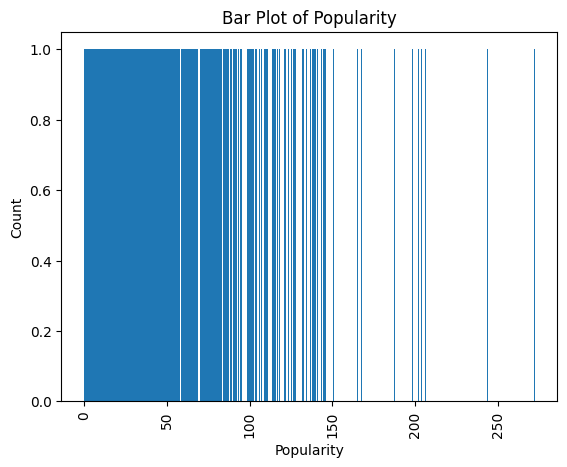

In [473]:
popularity_filtered=pop_data.loc[(data['popularity'] <400 )]['popularity'].value_counts()

plt.bar(popularity_filtered.index, popularity_filtered.values, width=0.4)

plt.xlabel('Popularity')
plt.ylabel('Count')
plt.title('Bar Plot of Popularity')
plt.xticks(rotation=90)


plt.show()

After deleting outliers it's still hard to see which part of the plot should be considered as neutral data, so we try to find appropriate values, by guessing and checking how big the set of positive and negative data is.

In [474]:
print(data.loc[(pop_data['popularity'] >400 )]['original_title'])

28              Jurassic World
94     Guardians of the Galaxy
95                Interstellar
127         Mad Max: Fury Road
788                   Deadpool
Name: original_title, dtype: object


The titles above are the most popular movies from our dataset.

In [475]:
pop_data.drop(pop_data[(pop_data['popularity'] >=10) & (pop_data['popularity'] <17)].index, inplace=True)

In [476]:
data.loc[data["popularity"] <10, "popularity"] = -1
data.loc[data["popularity"] >=17, "popularity"] = 1

In [477]:
popularity=pop_data['popularity'].value_counts()
popularity

,count
popularity,
-1.0,1654
1.0,1633


We created two classes and they have similar size.

In [478]:
X = pop_data['director']
y = pop_data['vote_average']

X_tfidf = vectorizer.fit_transform(X)

In [479]:
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size = 0.3)

In [480]:
model = MultinomialNB()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        -1.0       0.62      0.23      0.34       481
         1.0       0.54      0.87      0.67       506

    accuracy                           0.56       987
   macro avg       0.58      0.55      0.50       987
weighted avg       0.58      0.56      0.51       987



As before we get higher accuracy for finding more popular directors, than for the ones that aren't popular.

In [481]:
directors= vectorizer.get_feature_names_out()
log_prob = model.feature_log_prob_

In [482]:
popular_directors={}

for class_idx, class_log_prob in enumerate(log_prob):
  if class_idx==1:
    top_directors = np.argsort(class_log_prob)[::-1]
    for i in top_directors[:50]:
      popular_directors.update({directors[i]: class_log_prob[i]})

print(popular_directors)


{'Steven_Spielberg': -5.186978095192003, 'Martin_Scorsese': -5.592443203300167, 'Clint_Eastwood': -5.774764760094121, 'Peter_Jackson': -5.774764760094121, 'Robert_Zemeckis': -5.880125275751947, 'Jean': -5.979691302148742, 'Ron_Howard': -5.997908311408331, 'Richard_Linklater': -5.997908311408331, 'Ridley_Scott': -6.131439704032854, 'Tim_Burton': -6.131439704032854, 'Woody_Allen': -6.131439704032854, 'Christopher_Nolan': -6.131439704032854, 'Joel_Coen': -6.131439704032854, 'Ang_Lee': -6.285590383860113, 'Neil_Jordan': -6.285590383860113, 'James_Wan': -6.285590383860113, '_Gary_Gray': -6.285590383860113, 'Steven_Soderbergh': -6.285590383860113, 'David_Fincher': -6.285590383860113, 'Kenneth_Branagh': -6.285590383860113, 'Quentin_Tarantino': -6.285590383860113, 'Joe_Wright': -6.285590383860113, 'ufm': -6.338905240823651, 'Lasse_Hallstr': -6.4076428937957095, 'Stephen_Frears': -6.467911940654067, 'Oliver_Stone': -6.467911940654067, 'David_Lynch': -6.467911940654067, 'Paul_Thomas_Anderson': -

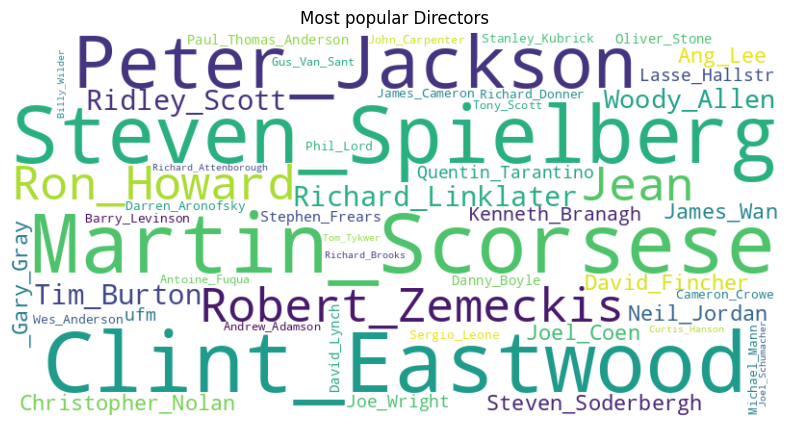

In [483]:
wordcloud = WordCloud(width=800, height=400, background_color="white").generate_from_frequencies(popular_directors)


plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Most popular Directors")
plt.show()

We can see that the word cloud of most popular directors looks quite reasonable - we get a lot of popular names.